# Lebron James Data Machine Learning Workflow
1. Data cleaning and formatting
2. Exploratory data analysis.
3. Feature engineering and seletion
4. Establish a baseline and compare several machine learning models on a perfomance metric
5. Perform hyparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the test set
7. Interpret the model results to extent possible
8. Draw conclusions and write a well-documented report

# Objective 
The objective is to predict whether Lebron would win games for the team or loss the opponents
Objective is on the __win|loss__.

# Metrics 
Using the F1 score to evluate whether the model would correctly predict the game.

In [25]:
#Import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#No warnings about setting value on copy of slice
pd.options.mode.chained_assignment=None

#Display all of the columns of a dataframes
pd.set_option('display.max_columns',None)

#matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

#set default font size
plt.rcParams['font.size']=24

#Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

#Seaborn for visualization
import seaborn as sns
sns.set(font_scale=2)

#splitting data into training and testing
from sklearn.model_selection import train_test_split

In [26]:
#Read the data into a DataFrame
csv='Lebron_James_regular_stats.csv'
data=pd.read_csv('/Users/jacky/Lebron_James_data/datasets/{}'.format(csv))
data.drop(columns='Unnamed: 0',axis=1,inplace=True)

#display top of DataFrame
data.head()

,Rk,G,Date,Age,Tm,,Opp,.1,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2003-10-29,18-303,CLE,@,SAC,L (-14),1,42:00,12,20,0.600,0,2,0.0,1,3,0.333,2,4,6,9,4,0,2,3,25,24.7,-9
1,2,2,2003-10-30,18-304,CLE,@,PHO,L (-9),1,41:00,8,17,0.471,1,5,0.2,4,7,0.571,2,10,12,8,1,0,7,1,21,14.7,-3
2,3,3,2003-11-01,18-306,CLE,@,POR,L (-19),1,39:00,3,12,0.250,0,1,0.0,2,2,1.000,0,4,4,6,2,0,2,3,8,5.0,-21
3,4,4,2003-11-05,18-310,CLE,NaN,DEN,L (-4),1,41:00,3,11,0.273,0,2,0.0,1,1,1.000,2,9,11,7,2,3,2,1,7,11.2,-3
4,5,5,2003-11-07,18-312,CLE,@,IND,L (-1),1,44:00,8,18,0.444,1,2,0.5,6,7,0.857,0,5,5,3,0,0,7,2,23,9.0,-7


Do you see the vacant column names and the '-1' ? I would try to rename it make the correct order

In [27]:
#keep the columns values and edit the columns name
data.columns=['Rk', 'G','Date', 'Age', 'Tm', 'home/court', 'Opp', 'win|loss', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']

#Check the data again!
data.head()

,Rk,G,Date,Age,Tm,home/court,Opp,win|loss,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2003-10-29,18-303,CLE,@,SAC,L (-14),1,42:00,12,20,0.600,0,2,0.0,1,3,0.333,2,4,6,9,4,0,2,3,25,24.7,-9
1,2,2,2003-10-30,18-304,CLE,@,PHO,L (-9),1,41:00,8,17,0.471,1,5,0.2,4,7,0.571,2,10,12,8,1,0,7,1,21,14.7,-3
2,3,3,2003-11-01,18-306,CLE,@,POR,L (-19),1,39:00,3,12,0.250,0,1,0.0,2,2,1.000,0,4,4,6,2,0,2,3,8,5.0,-21
3,4,4,2003-11-05,18-310,CLE,NaN,DEN,L (-4),1,41:00,3,11,0.273,0,2,0.0,1,1,1.000,2,9,11,7,2,3,2,1,7,11.2,-3
4,5,5,2003-11-07,18-312,CLE,@,IND,L (-1),1,44:00,8,18,0.444,1,2,0.5,6,7,0.857,0,5,5,3,0,0,7,2,23,9.0,-7


# Columns Names Explanation
1. Rk : Rank
2. G : Season Game
3. Date : Game Day
4. Age : Age of Player at the start of February 1st of that season
5. Tm : Team
6. home/court : home(play in home)
7. Opp : Opponent
8. win|loss : win or loss (win score or win loss)
9. GS : Game Started
10. MP : Minutes Played
11. FG : Field Goals
12. FGA : Field Goals Attempts
13. FG% : Field Goals Percentage
14. 3P : 3-Point Field Goals
15. 3PA -- 3-Point Field Goal Attempts
16. 3P% -- 3-Point Field Goal Percentage
17. FT -- Free Throws
18. FTA -- Free Throw Attempts
19. FT% -- Free Throw Percentage
20. ORB -- Offensive Rebounds
21. DRB -- Defensive Rebounds
22. TRB -- Total Rebounds
23. AST -- Assists
24. STL -- Steals
25. BLK -- Blocks
26. TOV -- Turnovers
27. PF -- Personal Fouls
28. PTS -- Points
29. GmSc -- Game Score
30. +/- -- Plus/Minus

In [28]:
#See the columns data type and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 30 columns):
Rk            1143 non-null int64
G             1143 non-null int64
Date          1143 non-null object
Age           1143 non-null object
Tm            1143 non-null object
home/court    565 non-null object
Opp           1143 non-null object
win|loss      1143 non-null object
GS            1143 non-null int64
MP            1143 non-null object
FG            1143 non-null int64
FGA           1143 non-null int64
FG%           1143 non-null float64
3P            1143 non-null int64
3PA           1143 non-null int64
3P%           1103 non-null float64
FT            1143 non-null int64
FTA           1143 non-null int64
FT%           1131 non-null float64
ORB           1143 non-null int64
DRB           1143 non-null int64
TRB           1143 non-null int64
AST           1143 non-null int64
STL           1143 non-null int64
BLK           1143 non-null int64
TOV           1143 non-null int

We see the __home/court__ is not same as the other columns that have 1143 rows. Thenm we should tackle this column first.

In [29]:
#replace the home/court values first
#0 is home and 1 is court
data['home/court']=data['home/court'].replace({np.nan:0,'@':1})

In [55]:
#Check the column that was replaced by the new values
data.head()

,Rk,G,Date,Age,Tm,home/court,Opp,win|loss,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,win_score
0,1,1,2003-10-29,18-303,CLE,1,SAC,L,1,42:00,12,20,0.600,0,2,0.0,1,3,0.333,2,4,6,9,4,0,2,3,25,24.7,-9,-14
1,2,2,2003-10-30,18-304,CLE,1,PHO,L,1,41:00,8,17,0.471,1,5,0.2,4,7,0.571,2,10,12,8,1,0,7,1,21,14.7,-3,-9
2,3,3,2003-11-01,18-306,CLE,1,POR,L,1,39:00,3,12,0.250,0,1,0.0,2,2,1.000,0,4,4,6,2,0,2,3,8,5.0,-21,-19
3,4,4,2003-11-05,18-310,CLE,0,DEN,L,1,41:00,3,11,0.273,0,2,0.0,1,1,1.000,2,9,11,7,2,3,2,1,7,11.2,-3,-4
4,5,5,2003-11-07,18-312,CLE,1,IND,L,1,44:00,8,18,0.444,1,2,0.5,6,7,0.857,0,5,5,3,0,0,7,2,23,9.0,-7,-1


Split the __win|loss__ to __win|loss and __win_score__

__win|loss__ explains if the Lebron James's teams win or loss

__win_score__ explain how much scores the Lebron James's teams win

In [52]:
data['win_score']=data['win|loss'].str.slice(3,-1)
data['win|loss']=data['win|loss'].str.slice(0,1)

3P%     40
FT%     12
3PA      0
G        0
Date     0
dtype: int64


Text(0.5,1,'missing value in 3P% and FT%')

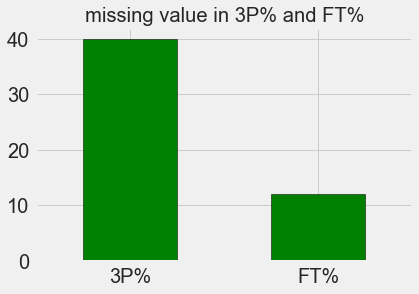

In [441]:
print(data.isnull().sum().sort_values(ascending=False)[:5])
data[['3P%','FT%']].isnull().sum().plot(kind='bar',color='green',edgecolor='k')
plt.xticks(rotation=0)
plt.title('missing values count in 3P% and FT%')

We could see why it is __NaN__  because the numerator is 0. The Python could not process the __0/0__

In [476]:
data[(data['3P%'].isnull()) | data['FT%'].isnull()][['3P','3PA','3P%','FT','FTA','FT%']]

,3P,3PA,3P%,FT,FTA,FT%
5,0,0,NaN,1,4,0.250
6,3,3,1.000,0,0,NaN
18,0,3,0.000,0,0,NaN
19,0,2,0.000,0,0,NaN
20,0,0,NaN,4,4,1.000
47,0,0,NaN,2,2,1.000
50,0,0,NaN,4,4,1.000
51,0,0,NaN,4,4,1.000
52,0,0,NaN,8,12,0.667
61,0,0,NaN,6,7,0.857


So we just fill the nan. 

In [478]:
data.fillna(0,inplace=True)

#Check the data information again.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 31 columns):
Rk            1143 non-null int64
G             1143 non-null int64
Date          1143 non-null object
Age           1143 non-null object
Tm            1143 non-null object
home/court    1143 non-null int64
Opp           1143 non-null object
win|loss      1143 non-null object
GS            1143 non-null int64
MP            1143 non-null object
FG            1143 non-null int64
FGA           1143 non-null int64
FG%           1143 non-null float64
3P            1143 non-null int64
3PA           1143 non-null int64
3P%           1143 non-null float64
FT            1143 non-null int64
FTA           1143 non-null int64
FT%           1143 non-null float64
ORB           1143 non-null int64
DRB           1143 non-null int64
TRB           1143 non-null int64
AST           1143 non-null int64
STL           1143 non-null int64
BLK           1143 non-null int64
TOV           1143 non-null int

We could see the counts of the win and loss. After entering the building model part, we should use the stratified to select the proper set. 

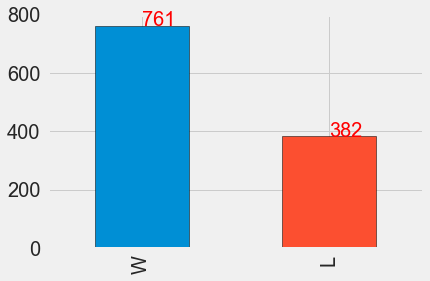

In [389]:
data_win=data['win|loss'].value_counts()
data_win.plot(kind='bar',edgecolor='black')
#write the text into the figure
for i in range(2):
    plt.text(x=i,y=data_win[i],s='{}'.format(data_win[i]),fontdict={'size':20,'color':'red'})

# Select dtypes='int' columns
I uses the sns.kdeplot to see the distribution about the columns to the target __win|loss__. It is not bad, because you could see the __turnover__ , __home/court__ ,  __+/-__ , __personalfoul__ , __Ast__ , __orb__ , __stl__  and __fga__ are important than other columns to the target __win|loss__

/Users/jacky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jacky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


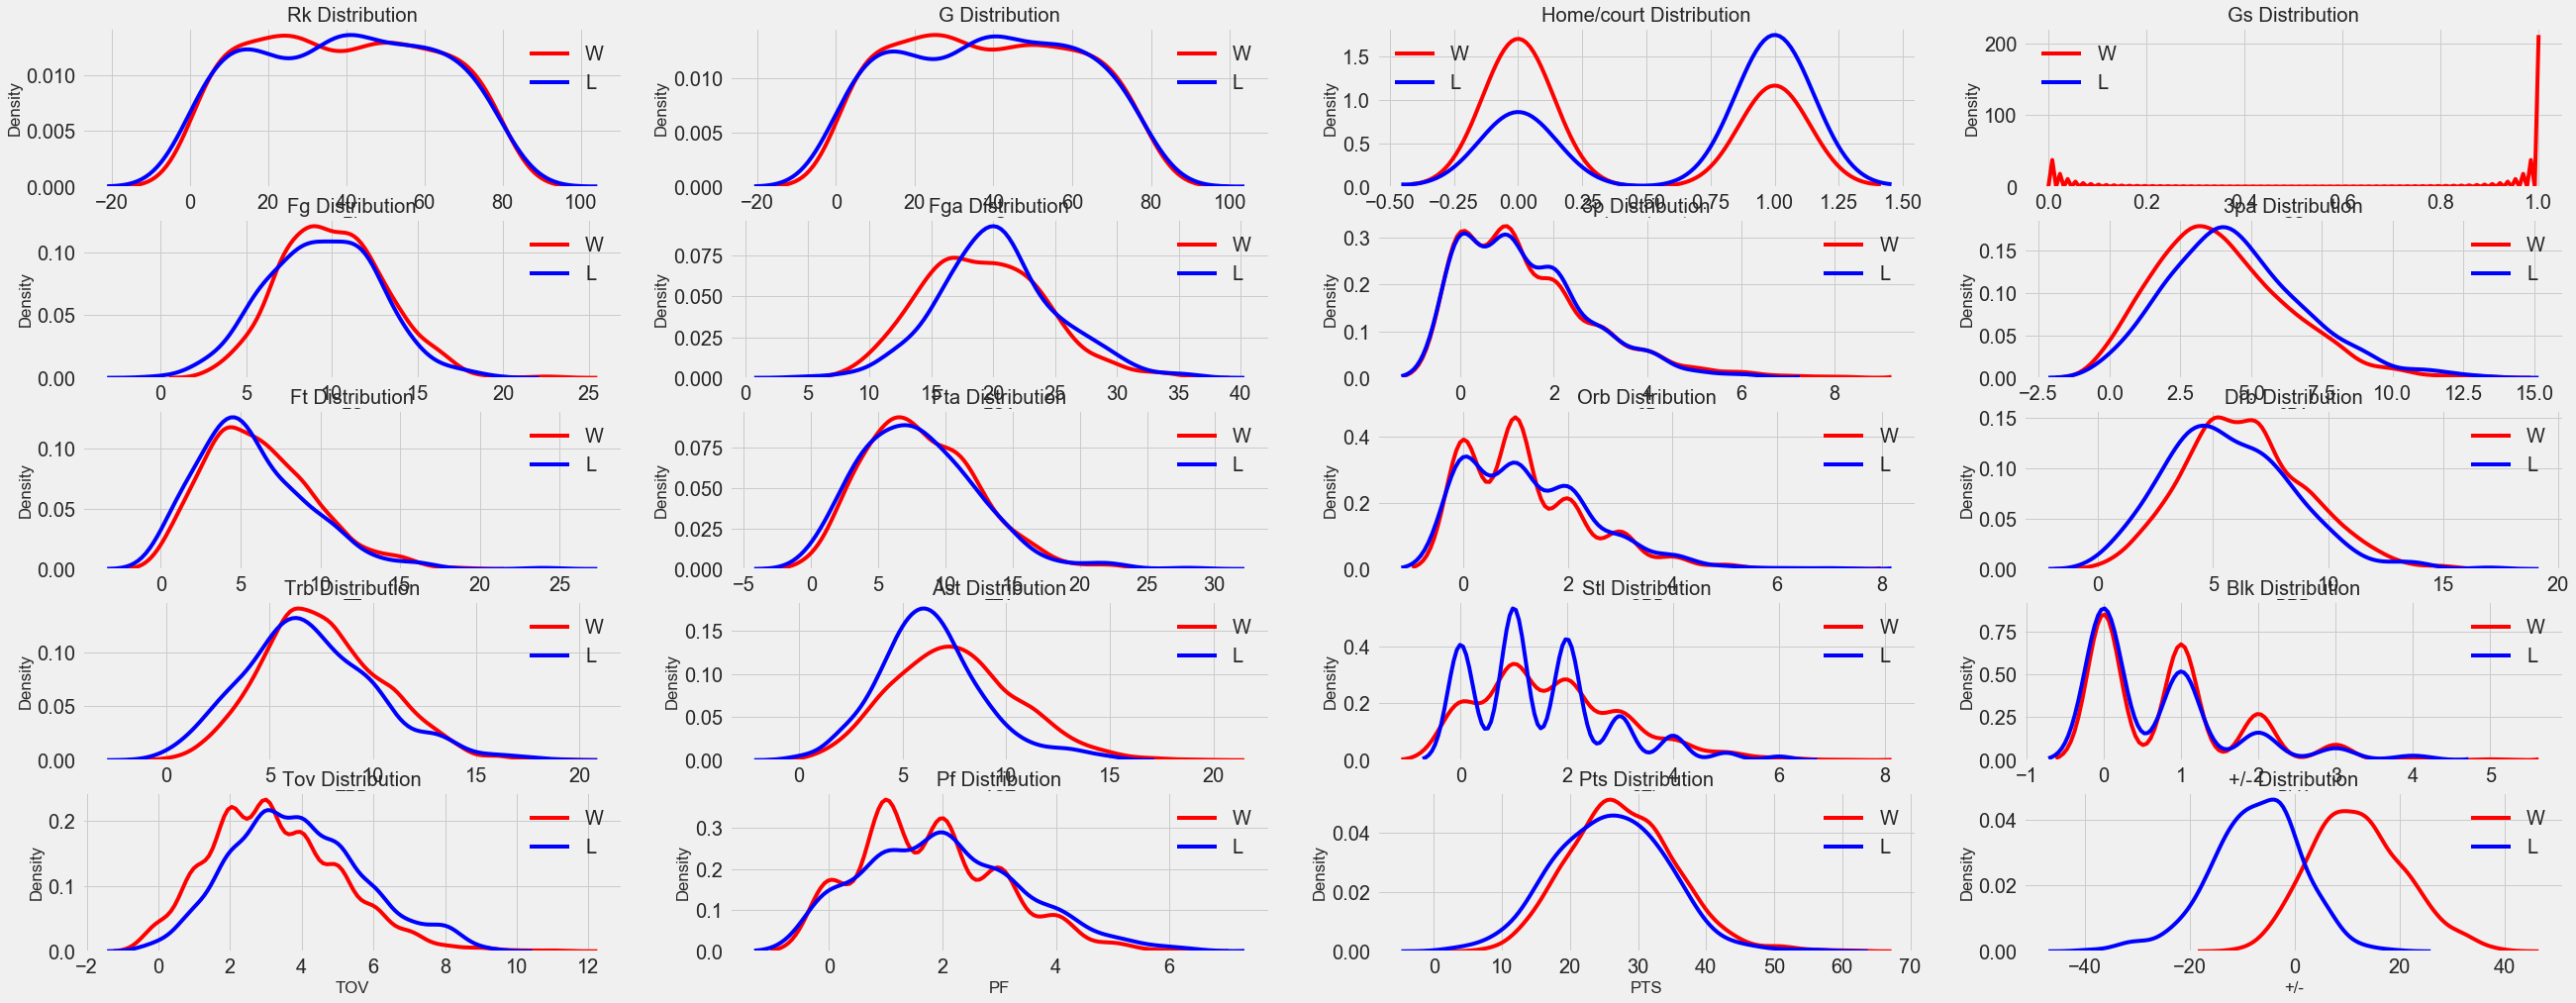

In [120]:
from collections import OrderedDict
plt.figure(figsize = (40, 16))
plt.style.use('fivethirtyeight')
colors=OrderedDict({1:'red',2:'blue'})
win_loss=OrderedDict({1:'W',2:'L'})
for i, columns in enumerate(data.select_dtypes(np.int)):
    ax=plt.subplot(5,4,i+1)
    for win, color in colors.items():
        sns.kdeplot(data=data.loc[data['win|loss']==win_loss[win],columns],
                    color=color,ax=ax,label=win_loss[win])
    plt.xlabel(f'{columns}')
    plt.ylabel('Density')
    plt.title(f'{columns.capitalize()} Distribution')

# Select dtype='np.float64' columns

I used the sns.kdeplot againg to plot the __dtype=np.float64__. I think that the plot is better than 'np.int' plot. You can see all of the float type columns would influence the target. So we should keep it all.

/Users/jacky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/jacky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


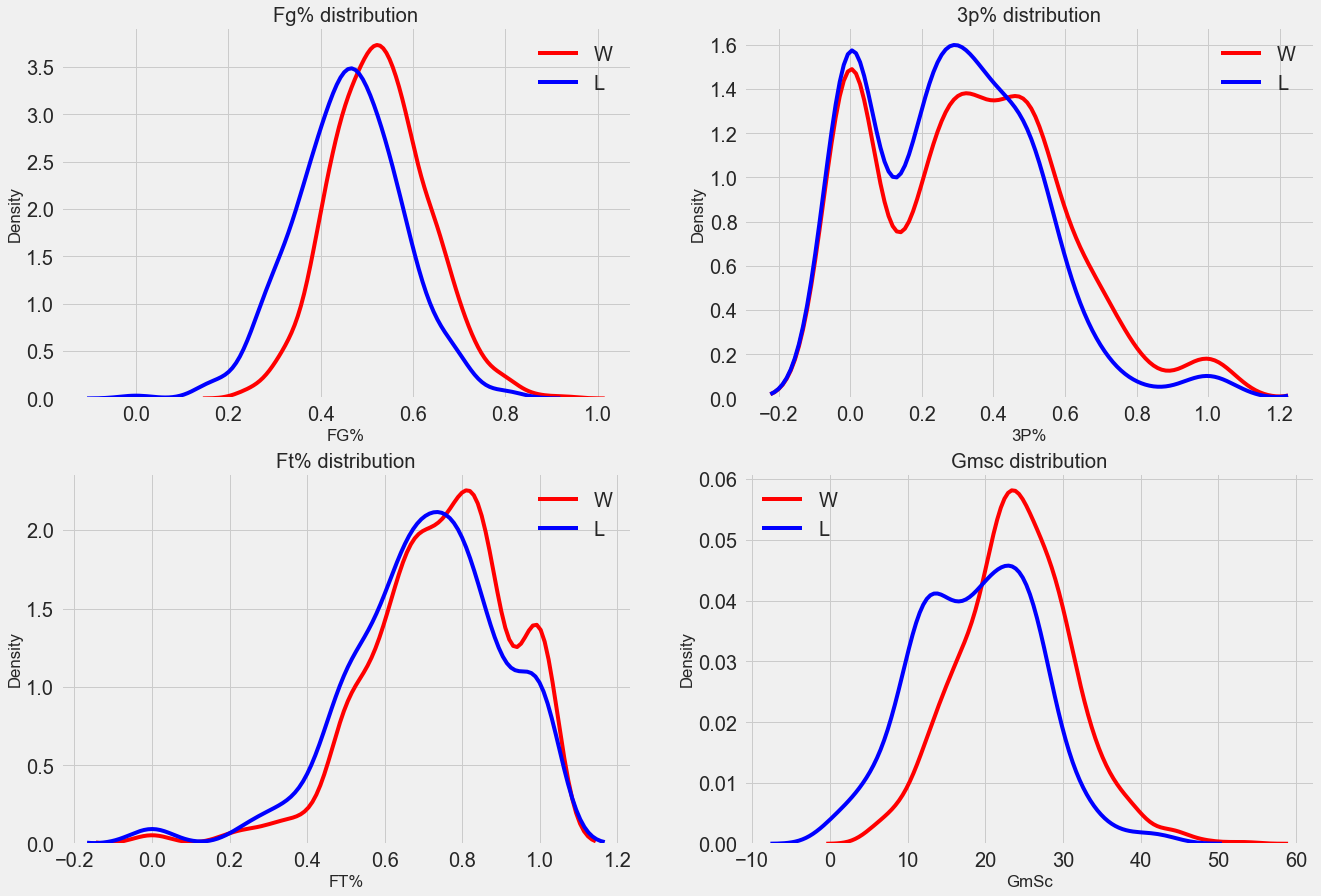

In [364]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,14))
colors=OrderedDict({1:'red',2:'blue'})
win_loss=OrderedDict({1:'W',2:'L'})

for i,columns in enumerate(data.select_dtypes(np.float64)):
    ax=plt.subplot(2,2,i+1)
    for win,color in colors.items():
        sns.kdeplot(data.loc[data['win|loss']==win_loss[win],columns],ax=ax,color=color,label=win_loss[win])
    plt.xlabel(columns)
    plt.ylabel('Density')
    plt.title(f'{columns.capitalize()} distribution')
plt.legend(loc='upper left')

# Right now! We could focus on the Opponent teams that Lebron ever faced 

Different team would influence the win/loss function. I would used get_dummies function to get the columns dummy

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text xticklabel objects>)

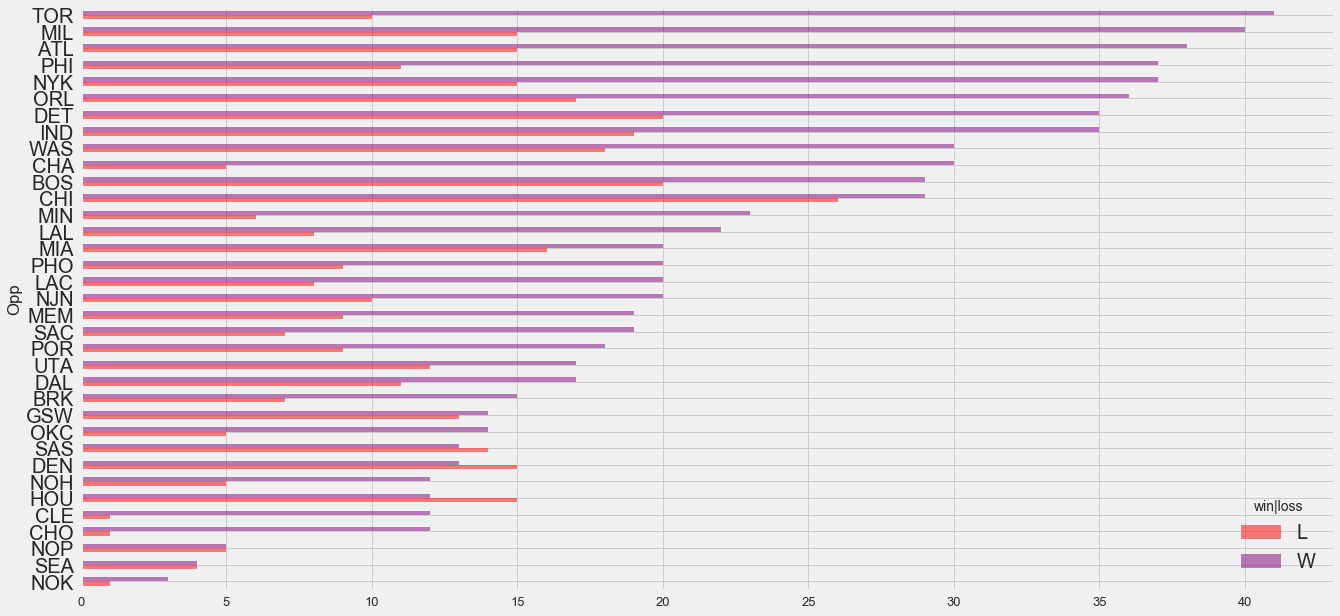

In [340]:
data_Opp=data.groupby(['Opp','win|loss'])['win|loss'].count()
data_Opp=data_Opp.unstack(level=-1)
data_Opp.sort_values(by='W',inplace=True)
plt.style.use('fivethirtyeight')
data_Opp.plot(kind='barh',figsize=(20,10),color=['red','purple'],alpha=0.5)
plt.xticks(rotation=0,fontsize=13)

We do not dicuss the date and the team because Lebron James performance is not influnce by the data except for the 2003-2004 season.

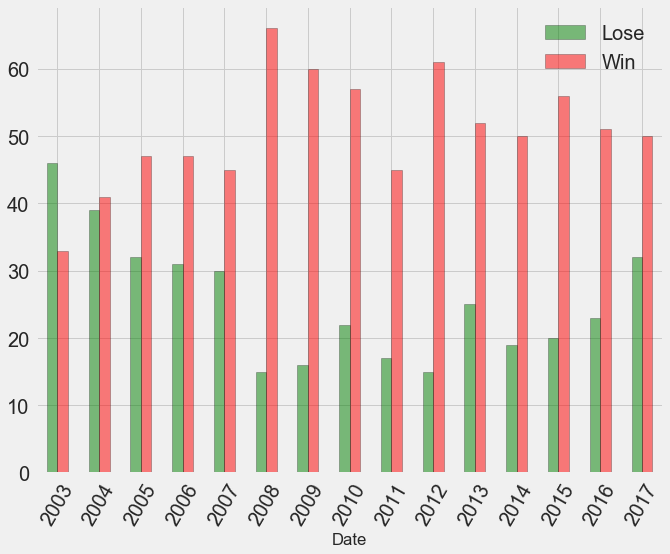

In [343]:
data_copy=data.copy()
pd.to_datetime(data['Date'])
data_copy=data_copy.set_index(pd.to_datetime(data['Date']))
data_copy.drop('Date',axis=1,inplace=True)
data_copy.index=data_copy.index.to_period('M').asfreq('A-SEP')-1
data_copy.groupby(data_copy.index)['win|loss'].value_counts().unstack().plot(kind='bar',figsize=(10,8),color=['green','red'],alpha=0.5,edgecolor='black')
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.legend(labels=['Lose','Win'])

# We check the 'GS' columns
Because the columns explains Lebron James where is in the starting lineup in every game

2
[1 0]
     GS
1  1142
0     1


([<matplotlib.patches.Wedge at 0x1a2ea4ed68>,
 [Text(-1.1,0.00302335,'Start'), Text(1.1,-0.00302331,'Not Start')],
 [Text(-0.599998,0.0016491,'99.91%'), Text(0.599998,-0.00164908,'0.09%')])

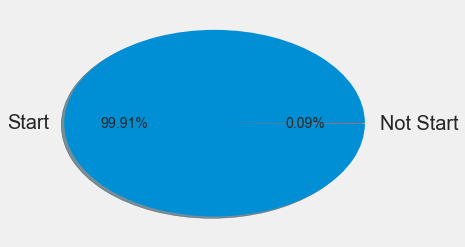

In [363]:
#Check the column how much the different categories it has
print(data['GS'].nunique())

#The unique categories name
print(data['GS'].unique())

#Plot the figure that how percent they have
#1 is Start 0 is not start
print(pd.DataFrame(data['GS'].value_counts()))

#It is akward figure, but it is prominant to explain we could drop the column
plt.pie(data['GS'].value_counts(),labels=['Start','Not Start'],shadow=True,autopct='%.2f%%')

In this project we do not discuss whether the time series would influence the win or loss. The, we would not select the columns __Date__ and __MP__

The features that I could use right now are __turnover__ , __home/court__ ,  __+/-__ , __personalfoul__ , __Ast__ , __orb__ , __stl__  , __fga__ , __Fg%__ , __3P%__ , __Ft%__ , __GmSc__ and the __Opp__.

In [765]:
X=data[['TOV','home/court','+/-','PF','AST','ORB','STL','FGA','FG%','3P%','FT%','GmSc','Opp']]
y=data[['win|loss']]
y.replace({'W':1,'L':0},inplace=True)

# Begin to conduct feature engineering
Feature engineering is creating additional feature from the raw data

In [766]:
X['Opp'].nunique()

35

In [767]:
X_Opp=X['Opp']
X_Opp=pd.get_dummies(X_Opp,drop_first=True)
X=pd.concat([X,X_Opp],axis=1)
X.drop('Opp',axis=1,inplace=True)

In [768]:
X.shape

(1143, 46)

# Find the collinear features

In [769]:
def remove_collinear_features(x,threshold):
    corr_matrix=X.corr()
    iter=range(len(corr_matrix)-1)
    drop_cols=[]
    for i in iter:
        for j in range(i):
            item=corr_matrix.iloc[j:j+1,(i+1):(i+2)]
            col=item.columns
            row=item.index
            val=abs(item.values)
            if val >= threshold:
                drop_cols.append(col.values[0])
        drops=drop_cols
    x=x.drop(columns=drops)
    return x

In [771]:
X=remove_collinear_features(X,0.6)
X.shape

(1143, 45)

This way we want to try the __PCA__(Principa Component Analysis) to reduct the dimension 

In [773]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)
np.round(pca.explained_variance_ratio_,2)

array([0.8 , 0.11, 0.04, 0.02, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [986]:
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2,random_state=42,stratify=y)

Scale the feature 

In [987]:
from sklearn.preprocessing import MinMaxScaler

In [988]:
#Create the scaler objects with a range of 0-1
scaler=MinMaxScaler(feature_range=(0,1))

#Fit on the trainging data
scaler.fit(X_train)

#Transform the training and testing data
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [989]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [990]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [991]:
def fit_evaluater(originalmodel,X,y,X_test,y_test):
    model=originalmodel()
    model.fit(X,y)
    y_predict=model.predict(X_test)
    model_mean_square_error=mean_squared_error(y_test,y_predict)
    return model_mean_square_error

In [992]:
lr_error=fit_evaluater(LogisticRegression,X_train,y_train,X_test,y_test)
print('Logistics Regression performance on the test set: MSE= %0.4f' %lr_error)

Logistics Regression performance on the test set: MSE= 0.1441


In [993]:
svc_error=fit_evaluater(SVC,X_train,y_train,X_test,y_test)
print('Support Vector Classifier performance on the test set: MSE= %0.4f' %svc_error)

Support Vector Classifier performance on the test set: MSE= 0.2227


In [994]:
rfc_error=fit_evaluater(RandomForestClassifier,X_train,y_train,X_test,y_test)
print('RandomForest performance on the test set: MSE= %0.4f' %rfc_error)

RandomForest performance on the test set: MSE= 0.1135


In [995]:
gbc_error=fit_evaluater(GradientBoostingClassifier,X_train,y_train,X_test,y_test)
print('Gradient Boosting Classifier performance on the test set: MSE= %0.4f' %gbc_error)

Gradient Boosting Classifier performance on the test set: MSE= 0.0873


In [996]:
knc_error=fit_evaluater(KNeighborsClassifier,X_train,y_train,X_test,y_test)
print('KNeighborsClassifier performance on the test set: MSE= %0.4f' %knc_error)

KNeighborsClassifier performance on the test set: MSE= 0.2838


Text(0,0.5,'model')

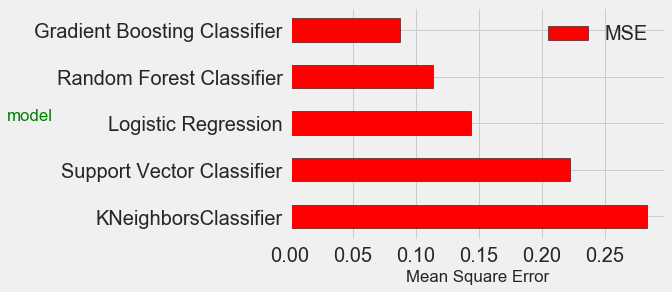

In [997]:
model_comparison=pd.DataFrame({'model':['Logistic Regression','Support Vector Classifier','Random Forest Classifier',
                                                               'Gradient Boosting Classifier','KNeighborsClassifier'],
                                                   'MSE':[lr_error,svc_error,rfc_error,gbc_error,knc_error] })
model_comparison.sort_values(by='MSE',ascending=False).plot(kind='barh',x='model',y='MSE',edgecolor='k',color='red')
plt.xlabel('Mean Square Error')
plt.ylabel('model',rotation=0,color='green')

In [998]:
from sklearn.metrics import make_scorer,f1_score
score=make_scorer(f1_score,greater_is_better=True,average='macro')

In [999]:
model=[LogisticRegression(),SVC(),RandomForestClassifier(),GradientBoostingClassifier()]
models=[]
model_mean=[]
model_std=[]
for model_new in model:
    cross_score=cross_val_score(model_new,X_train,y_train,scoring=score,n_jobs=-1)
    models.append(model_new)
    model_mean.append(np.mean(cross_score))
    model_std.append(np.std(cross_score))


In [1000]:
df=pd.DataFrame({'model':models,'model_mean':model_mean,'model_std':model_std})
df

,model,model_mean,model_std
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.846612,0.014196
1,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.484987,0.023430
2,"RandomForestClassifier(bootstrap=True, class_w...",0.873311,0.011970
3,GradientBoostingClassifier(criterion='friedman...,0.869770,0.013489


In [1001]:
rft=RandomForestClassifier()
 y_pred=model.predict(X_test)
print(sum(y_pred==y_test)/len(y_pred))

0.8777292576419214


In [1002]:
GBCC=GradientBoostingClassifier()
model=GBCC.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(sum(y_pred==y_test)/len(y_pred))

0.9126637554585153


In [1003]:
k=GradientBoostingClassifier()
k.fit(X_train,y_train)
y_predict=k.predict(X_test)
print(sum(y_predict==y_test)/len(y_test))

0.9126637554585153


# Hyperparameter Tuning with Random Search and Cross Validation

In [1004]:
# Loss function to be optimized
loss=['deviance','exponential']

#Number of tree used in the boosting process
n_estimators=[100,500,900,1100,1500]

#Maximum depth of each tree
max_depth=[2,3,5,10,15]

#Minimum number of samples per leaf
min_sample_leaf=[1,2,4,6,9]

#Minimum number of samples to split a node
min_samples_split=[2,4,6,10]

#Maximum number of features to consider for making splits
max_features=['auto','sqrt','log2',None]

#Define the grid of hyperparameters to search
hyperparameter_grid={'loss':loss,
                                'n_estimators':n_estimators,
                                'max_depth':max_depth,
                                'min_samples_leaf':min_sample_leaf,
                                'min_samples_split':min_samples_split,
                                'max_features':max_features}

In [1005]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [1006]:
model=GradientBoostingClassifier(random_state=42)

random_cv=RandomizedSearchCV(estimator=model,param_distributions=hyperparameter_grid,n_iter=25,scoring=score,cv=4,
                                                     n_jobs=-1,verbose=1,return_train_score=True,random_state=42)

In [1007]:
random_cv.fit(X_train,y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.5s finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['deviance', 'exponential'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 9], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True,
          scoring=make_scorer(f1_score,

In [1008]:
random_results=pd.DataFrame(random_cv.cv_results_).sort_values(by='mean_test_score',ascending=False)
random_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
15,1.097984,0.018701,0.005312,0.000064,1500,2,4,log2,10,exponential,"{'n_estimators': 1500, 'min_samples_split': 2,...",0.897171,0.873600,0.873600,0.903936,0.887099,0.013680,1,1.0,1.0,1.0,1.0,1.0,0.0
18,0.545502,0.003675,0.002615,0.000011,100,10,2,sqrt,15,exponential,"{'n_estimators': 100, 'min_samples_split': 10,...",0.872266,0.873600,0.878205,0.919972,0.885981,0.019720,2,1.0,1.0,1.0,1.0,1.0,0.0
13,0.797721,0.018542,0.005780,0.000402,900,2,9,log2,10,deviance,"{'n_estimators': 900, 'min_samples_split': 2, ...",0.877584,0.883712,0.868056,0.903936,0.883309,0.013133,3,1.0,1.0,1.0,1.0,1.0,0.0
21,0.207305,0.002479,0.001861,0.000013,100,2,9,sqrt,10,exponential,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.882092,0.878205,0.862463,0.909968,0.883180,0.017104,4,1.0,1.0,1.0,1.0,1.0,0.0
17,1.089605,0.009338,0.005932,0.000099,1500,10,1,sqrt,5,exponential,"{'n_estimators': 1500, 'min_samples_split': 10...",0.891917,0.873600,0.862463,0.899249,0.881830,0.014552,5,1.0,1.0,1.0,1.0,1.0,0.0


The best gradient boosted model has the following hyperparameters
1. loss='exponential'
2. n_estimators=1500
3. max_depth=10
4. min_samples_leaf=4
5. min_samples_split=2
6. max_features=log2


In [1035]:
random_cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [1053]:
model=GradientBoostingClassifier(loss='exponential',max_depth=10,
                                                min_samples_leaf=4,min_samples_split=2,
                                                max_features='log2')

grid_search=GridSearchCV(estimator=model,param_grid={'n_estimators':np.arange(100,2000,100)},
                                        cv=7,scoring=score,verbose=1,n_jobs=-1,return_train_score=True)
grid_search.fit(X_train,y_train)

Fitting 7 folds for each of 19 candidates, totalling 133 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:   35.9s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, average=macro), verbose=1)

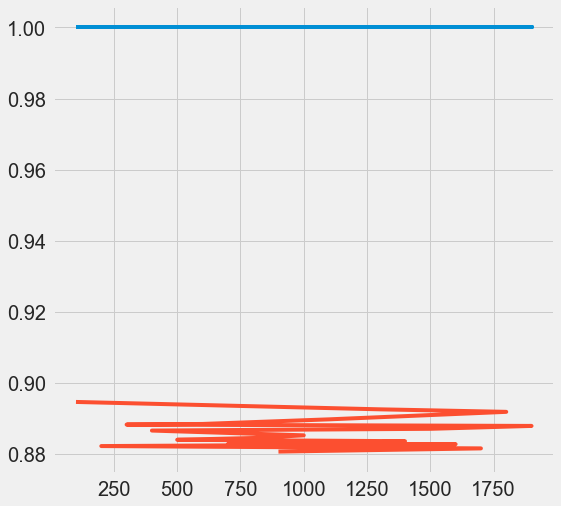

In [1054]:
results=pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score',ascending=False)
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'],results['mean_train_score'],label='Train_error')
plt.plot(results['param_n_estimators'],results['mean_test_score'],label='Test_erro')

In [1055]:
default_model=GradientBoostingClassifier(random_state=42)
final_model=grid_search.best_estimator_
default_model.fit(X_train,y_train)
final_model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [1098]:
y_pred_default=default_model.predict(X_test)
y_pred_final=final_model.predict(X_test)
print('Default model performance on the test set: f1= %0.4f' %f1_score(y_test,y_pred_default))
print('Final model performance on the test set: f1= %0.4f' %f1_score(y_test,y_pred_final))

Default model performance on the test set: f1= 0.9351
Final model performance on the test set: f1= 0.9216


In [1097]:
print(sum(y_test==y_pred_default)/len(y_test))
print(sum(y_test==y_pred_final)/len(y_test))

0.9126637554585153
0.8951965065502183


In [1058]:
from sklearn.metrics import confusion_matrix

In [1059]:
confusion_matrix(y_test,y_pred_default)

array([[ 65,  12],
       [  8, 144]])

In [1096]:
confusion_matrix(y_test,y_pred_final)

array([[ 64,  13],
       [ 11, 141]])

In [1044]:
from sklearn.cross_validation import cross_val_score

In [1063]:
default_cross_validation=cross_val_score(default_model,X_test,y_test,scoring='accuracy',cv=20)
print(default_cross_validation)
print(np.mean(np.array(default_cross_validation)))
final_cross_validation=cross_val_score(final_model,X_test,y_test,scoring='accuracy',cv=20)
print(final_cross_validation)
print(np.mean(np.array(final_cross_validation)))

[0.75       0.75       0.91666667 0.83333333 0.91666667 0.91666667
 0.91666667 0.91666667 0.66666667 0.91666667 0.91666667 0.83333333
 0.81818182 0.90909091 0.81818182 0.90909091 0.81818182 1.
 1.         1.        ]
0.8761363636363637
[0.91666667 0.75       1.         0.83333333 0.91666667 0.91666667
 0.91666667 0.91666667 0.66666667 1.         0.91666667 0.83333333
 0.90909091 0.90909091 0.90909091 0.81818182 0.72727273 1.
 0.9        1.        ]
0.8878030303030302


In [1065]:
print((y_train==final_model.predict(X_train)).sum()/len(X_train))

1.0


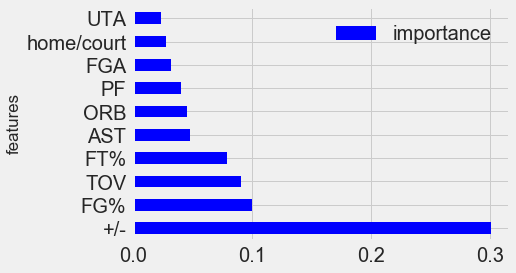

In [1047]:
feature_importance=pd.DataFrame({'features':X.columns,'importance':default_model.feature_importances_}).sort_values(by='importance',ascending=False).reset_index(drop=True)
feature_importance.head(10).plot(kind='barh',x='features',y='importance',color='blue')

In [1068]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

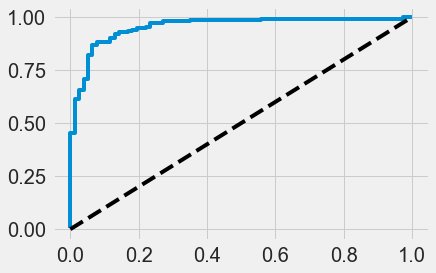

In [1086]:
plt.plot(fpt,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

In [1090]:
roc_auc_score(y_test,final_model.predict_proba(X_test)[:,1])

0.955228981544771

In [1094]:
cv_auc=cross_val_score(final_model,X_train,y_train,cv=5,scoring='roc_auc')

In [1095]:
cv_auc

array([0.93657619, 0.95592583, 0.94719162, 0.94987906, 0.96436797])